In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# CNN Architecture

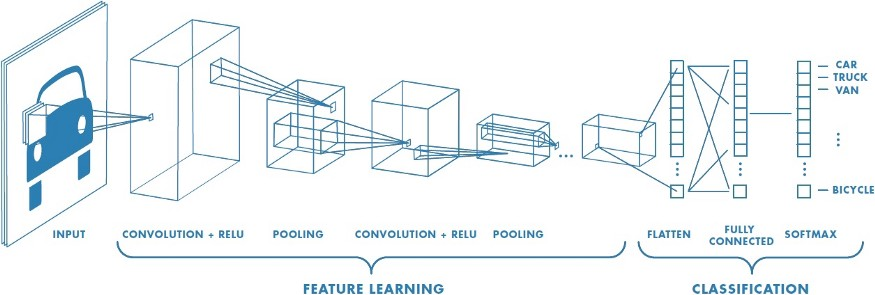

# Importing Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Importing dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Assigning Classnames

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Standardization

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Validation Set

In [ ]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

# looking at few input images

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Fixing the CNN Image Size

In [ ]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

# Convolution Layer paramaters

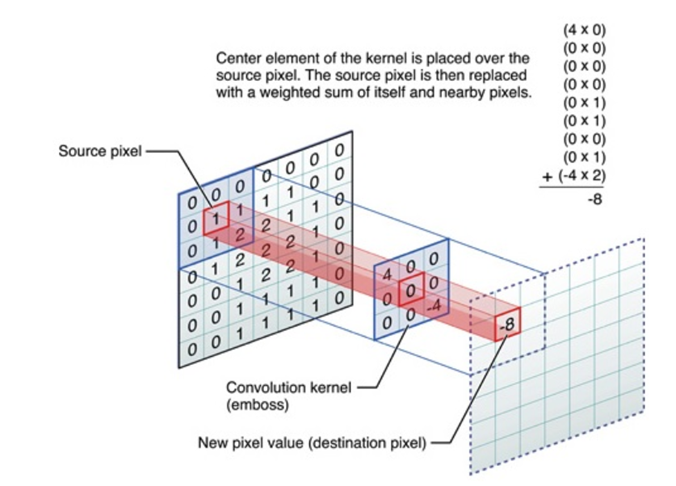

**tf.keras.layers.Conv2D(filters,kernel_size,strides=(1, 1),padding="valid",data_format=None, dilation_rate=(1, 1),
    groups=1,activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros",kernel_regularizer=None,
    bias_regularizer=None,activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs
)**

# Pooling Parameters

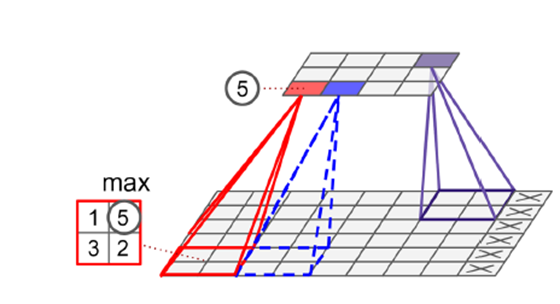

**tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
)**

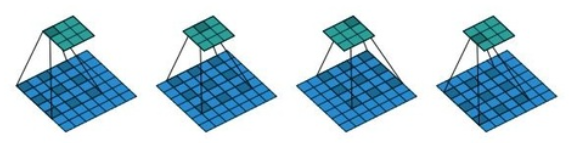

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape))
cnn_model.add(MaxPool2D(pool_size=2)) # down sampling the output instead of 28*28 it is 14*14
cnn_model.add(Flatten())# flatten out the layers
cnn_model.add(Dense(32,activation='relu'))
cnn_model.add(Dense(10,activation = 'softmax'))

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=15,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

# Plotting the accuracy and loss

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

# Predicting on the testset

In [ ]:
#Get the predictions for the test data
predicted_classes = cnn_model.predict_classes(x_test)
#Get the indices to be plotted
#y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(class_names )]
print(classification_report(y_test, predicted_classes, target_names=class_names))